# Iniciando com Keras do TensorFlor

### Bruno Oliveira

## 1. Algoritmo

⇒ Antes de poder usar o Keras temos primeiramente que importar para o nosso ambiente de programação o TensorFlow. Isso é feito da seguinte forma:

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

⇒ O comando tf __version__ fornece a informação de qual versão do TensorFlow estamos usando.

⇒ Após importar o TensorFlow podemos importar as funções do Keras que queremos usar da seguinte forma:

In [2]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Activation

⇒ Esses dois comandos importam a estrutura de modelo seqüencial e as camadas do tipo totalmente conectadas (densa) e as funções de ativação.

⇒ Uma RNA sequencial pode ser criada simplesmente passando uma lista de instâncias de camadas para o construtor do Keras, da seguinte forma:

In [3]:
model = models.Sequential([
Dense(32, input_shape=(1024,)),
Activation('relu'),
Dense(1),
Activation('sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                32800     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


⇒ Esse comando define uma RNA de uma camada intermediária e uma camada de saída com as seguintes características:
    - Os dados de entrada de cada exemplo de treinamento são vetores linha de dimensão (1024);
    - Observa-se que não é incluída a dimensão do segundo eixo do tensor de entrada no argumento input_shape , porque
nesse momento não se conhece o número de exemplos que serão usados no treinamento;
    - Cuidado apesar de parecer que no argumento input_shape o segundo eixo é o número de exemplos, o Keras
espera que o primeiro eixo do tensor de entrada seja o número de exemplos;
    - A camada escondida é do tipo densa (totalmente conectada), possui 32 neurônios e a sua função de ativação é Relu;
    - A camada de saída é do tipo densa (totalmente conectada), possui 1 único neurônio e a sua função de ativação é
sigmóide.

**O nome utilizado para essa RNA foi model , mas poderia ser dado qualquer outro nome.**

⇒ O método summary() apresenta um resumo das principais características da rede.

rna = models.Sequential()
rna.add(Dense(32,input_shape=(1024,)))

OR

rna = models.Sequential()
rna.add(Dense(32,input_dim=1024))

⇒ Se for necessário especificar um número fixo de exemplos, pode-se passar o argumento batch_size para a camada de
entrada. Assim, por exemplo, se for usado batch_size=32 e input_shape=(6, 8) para a primeira camada, será esperado
como dados de entrada um tensor de dimensão (32, 6, 8).

⇒ O desenvolvimento de uma RNA exige muitas iterações até se obter um resultado desejável, assim, para evitar executar
inúmeras vezes os mesmos comandos de configuração de uma RNA, que podem ser muitos dependendo do tamanho da RNA, pode-se criar uma função para configurar a RNA. Para isso temos, por exemplo, a seguinte função:

In [4]:
def build_model(data_shape):
    rna = models.Sequential()
    rna.add(layers.Dense(units=64, activation='relu', input_shape=data_shape))
    rna.add(layers.Dense(units=32, activation='relu'))
    rna.add(layers.Dense(units=1, activation='sigmoid'))
    return rna

⇒ Nesse caso o argumento data_shape representa a dimensão dos dados de entrada sem considerar o número de exemplos.

**VISUALIZAÇÃO DA RNA**
⇒ Para visualizar a arquitetura de uma RNA que foi criada usa-se no Keras o método summary() , como segue:

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
data_shape = (12288,)
rna = build_model(data_shape)
rna.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 788,609
Trainable params: 788,609
Non-trainable params: 0
_________________________________________________________________


⇒ Outra forma de visualizar uma RNA no Keras é fazer um gráfico da mesma usando a função plot_model , como segue:


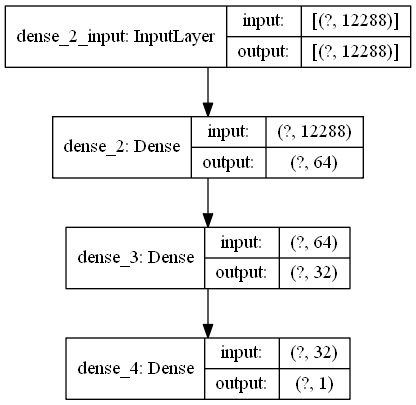

In [6]:
from tensorflow.keras.utils import plot_model
import pydot
plot_model(rna, to_file='rna.png', show_shapes=True)

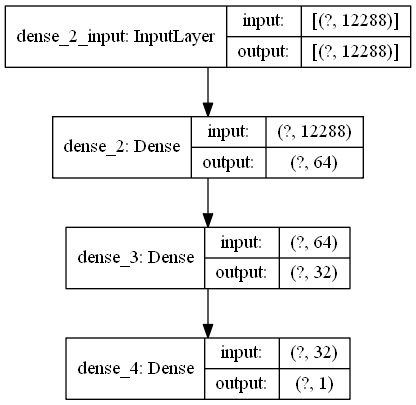

In [7]:
from tensorflow.keras.utils import plot_model
import pydot
plot_model(rna, to_file='rna.png', show_shapes=True)
# No Colab usar
#plot_model(rna, to_file='/tmp/rna.png', show_shapes=True)

**COMPILAÇÃO DA RNA**
⇒ A geração da RNA é realizada na etapa de compilação, onde é escolhida a função de custo, uma métrica para avaliação da RNA e configurado o método de treinamento.

In [13]:
from tensorflow.keras import optimizers
rna.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

⇒ O primeiro comando importa do Keras os otimizadores.
⇒ O segundo comando gera e compila a RNA definindo o seguinte:
    Método de otimização ⇒ gradiente descendente;
    Função de custo ⇒ função logística, também chamada de entropia cruzada binária;
    Métrica exatidão 

In [14]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.02)
rna.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

⇒ A única diferença desse exemplo para o anterior é que definimos a taxa de aprendizado como sendo igual a 0,02.

**TREINAMENTO**
⇒ O treinamento de uma RNA é realizado com o método fit() para treinar uma RNA usando 10 épocas o comando usado é
o seguinte:

rna.fit(x_train, y_train, epochs=10, verbose=2)


**SALVAR TREINAMENTO**
⇒ Salvar o processo de treinamento permite fazer gráficos da função de custo e da métrica, permitindo uma análise mais
detalhada do processo. Para isso usamos:

historia = rna.fit(x_train, y_train, epochs=10)

⇒ O objeto historia contém um dicionário com os valores da função de custo e das métricas em função do número de épocas, que podem ser acessadas usando o seguinte comenado:

history_dict = historia.history
history_dict.keys()

⇒ O comando history_dict.keys apresenta o conteúdo do dicionário salvo durante o treinamento.
